# Name: Dhruv Vudayagiri

# Student ID: 220375472

In [1]:
import numpy as np
from numpy.testing import assert_array_almost_equal, assert_array_equal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#to standardise the columns of a multi-dimensional array.
def standardise(data_matrix):
    #calculate the mean of each column and store it in a row vector
    row_of_means = np.mean(data_matrix, axis=0)
    #subtract the mean row vector from the data matrix
    standardised_matrix = data_matrix - row_of_means
    #calculate the standard deviation of each column and store it in a row vector
    row_of_stds = np.std(standardised_matrix, axis=0)
    #return the standardised matrix, the mean row vector, and the standard deviation row vector
    return (standardised_matrix / row_of_stds), row_of_means, row_of_stds

<b> Explanation: </b>

This function standardizes a multi-dimensional array (data_matrix) by subtracting the mean of each column from the corresponding column and dividing the result by the standard deviation of the same column.
It first calculate the mean of each column and store it in a row vector row_of_means using the np.mean function with axis=0 to calculate the mean of each column. Then it subtracts the mean row vector from the data matrix to get the standardised_matrix.
Then it calculates the standard deviation of each column and store it in a row vector row_of_stds using the np.std function with axis=0 to calculate the standard deviation of each column.
Finally, it returns the standardised matrix, the mean row vector, and the standard deviation row vector, which are (standardised_matrix / row_of_stds), row_of_means, row_of_stds respectively.

In [3]:
#to de-standardise the columns of a multi-dimensional array. 
def de_standardise(standardised_matrix, row_of_means, row_of_stds):
    # multiply each element of the standardised_matrix by the corresponding element in row_of_stds
    matrix = np.copy(standardised_matrix * row_of_stds)
    # add the corresponding element in row_of_means to each element of the matrix
    return matrix + row_of_means

<b> Explanation: </b>

This function de-standardizes a multi-dimensional array (standardised_matrix) by multiplying each element of the standardised_matrix by the corresponding element in row_of_stds and adding the corresponding element in row_of_means to each element of the matrix.
It first multiplies each element of the standardised_matrix by the corresponding element in row_of_stds using the * operator and the result is stored in a new matrix called matrix using the np.copy() function.
Then it adds the corresponding element in row_of_means to each element of the matrix using the + operator and returns the result.
This function is used to convert the standardized data back to its original scale.

In [4]:
# performs a data split of a given dataset into two sets; one for testing, and one for cross-validation.
def data_split(data_matrix, validation_ratio):
    data_size = len(data_matrix)
    validation_size = int(round(data_size*validation_ratio,0))
    # we take the int of round as 1.6 ->2, if you do just int(1,6) ->1
    rows_indexes = np.random.choice(data_size,validation_size, replace = False)
    # the line above selects a number equal to validation_size of indexes without replacement at random
    validation_data = data_matrix[rows_indexes,:]
    # we then select these random rows as validation set (remember samples runs on the rows)
    training_data = np.delete(data_matrix, obj = rows_indexes, axis = 0)
    # the training data is what is left
    return training_data, validation_data 

<b> Explanation: </b>

This function performs a data split of a given dataset into two sets; one for testing, and one for cross-validation. It takes in two arguments:

data_matrix: the data that will be split

validation_ratio: the ratio of the data that will be used for validation, the rest will be used for training
It first gets the number of data points and then calculates the size of the validation set. It then selects validation_size number of random indexes from the data_matrix without replacement by using the np.random.choice() function.
It then uses the selected indexes to select the validation data from the data matrix and uses the np.delete() function to delete the rows selected as validation data to get the training data. Finally, it returns the training data and validation data.

In [5]:
def classification_accuracy(estimated_labels, true_labels):
    equal_labels = estimated_labels == true_labels # this returns an array made of true and false 
    return np.mean(equal_labels) # the average is how many true we have

<b> Explanation: </b>

This function takes in two arguments:

estimated_labels: an array of predicted labels

true_labels: an array of true labels

The function first calculates an array of boolean values indicating whether the predicted label is equal to the true label using the line equal_labels = estimated_labels == true_labels. The next line calculates the proportion of predicted labels that are equal to the true labels using the np.mean(equal_labels) function. The returned value is the classification accuracy, which is a measure of how well the predicted labels match the true labels.

In [6]:
def plot_diabetes(data_input, data_output):
    # List of names of characteristics
    characteristics_names = \
    ['pregnancies', 'glucose','blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
    number_of_characteristics = data_input.shape[1]
    # De-standardise the input data
    diabetes_de_standardised = de_standardise(data_input, diabetes_row_of_means,
                                             diabetes_row_of_stds)
    # Create a dataframe from the de-standardised data
    diabetes_dataframe = pd.DataFrame(data=diabetes_de_standardised,
                                     columns=characteristics_names)
    # Add the outcome data to the dataframe
    diabetes_dataframe['outcome'] = data_output
    # Set the theme for the plot
    sns.set_theme(style="ticks", color_codes=True)
     # Create a pairgrid plot
    g = sns.PairGrid(diabetes_dataframe,
                     vars=diabetes_dataframe[:-1],
                     hue='outcome')
    # Use scatterplot for the off-diagonal plots
    g.map_offdiag(sns.scatterplot)
    # Use histograms for the diagonal plots
    g.map_diag(plt.hist)
    # Show the plot
    plt.show()
    # Adjust layout
    plt.tight_layout

<b> Explanation: </b>
    
This function takes in two arguments:

data_input: the input data
    
data_output: the output data, which will be used to create the color code for the visualization

The function first creates a list of names of characteristics, characteristics_names, which will be used to label the columns of the dataframe.
Then it calls the de_standardise function to de-standardize the input data by passing in the data_input, diabetes_row_of_means, and diabetes_row_of_stds.
Next, it creates a dataframe from the de-standard

In [48]:
def corre_plot_diabetes(data_input, data_output):
    # List of names of characteristics
    characteristics_names = \
    ['pregnancies', 'glucose','blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
    number_of_characteristics = data_input.shape[1]
    # De-standardise the input data
    diabetes_de_standardised = de_standardise(data_input, diabetes_row_of_means,
                                             diabetes_row_of_stds)
    # Create a dataframe from the de-standardised data
    diabetes_dataframe = pd.DataFrame(data=diabetes_de_standardised,
                                     columns=characteristics_names)
    # Add the outcome data to the dataframe
    diabetes_dataframe['outcome'] = data_output
    # Create a figure with a specific size
    plt.figure(figsize=(8,5))
    # Compute the correlation matrix
    corr = diabetes_dataframe.corr()
    # Create a heatmap of the correlation matrix
    heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
    # Show the plot
    plt.show()
    # Adjust layout
    plt.tight_layout

<b> Explaination: </b>

This function takes in two arguments:

data_input: the input data

data_output: the output data, which will be used to create the color code for the visualization

The function first creates a list of names of characteristics, characteristics_names, which will be used to label the columns of the dataframe.
It calls the de_standardise function to de-standardize the input data by passing in the data_input, diabetes_row_of_means, and diabetes_row_of_stds.
Next, it creates a dataframe from the de-standardized data, diabetes_dataframe and adds the outcome data to the dataframe.
It then creates a figure with a specific size and computes the correlation matrix by calling the .corr() function on the dataframe.
It then creates a heatmap of the correlation matrix using the sns.heatmap() function, setting the color map to "Blues", and the format to '.1g'
It finally shows the plot and adjust layout by calling plt.show() and `plt

# Visualizations

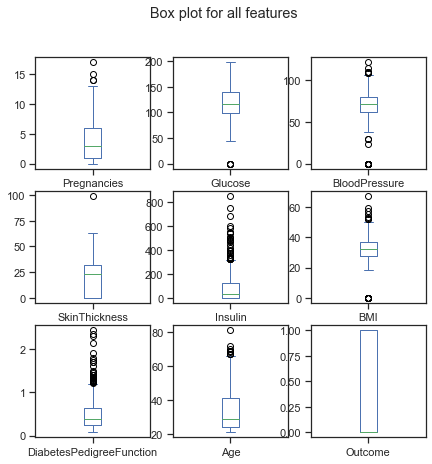

In [121]:
diabetes_dataframe = pd.read_csv("diabetes.csv")
diabetes_dataframe.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,figsize=(7,7))
plt.suptitle("Box plot for all features")
plt.show()

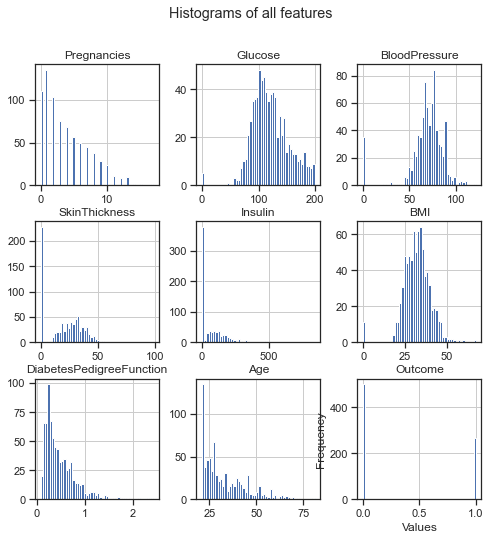

In [123]:
diabetes_dataframe.hist(bins=50, figsize=(8,8))
plt.suptitle("Histograms of all features")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

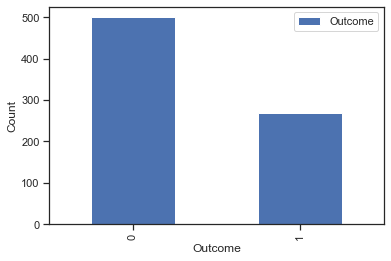

In [116]:
diabetes_dataframe.Outcome.value_counts().plot(kind="bar",legend=True)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

# Binary logistic regression

In [43]:
diabetes_dataframe = pd.read_csv("diabetes.csv")
diabetes_dataset_path = "diabetes.csv"
pregnancies = np.genfromtxt(diabetes_dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(int)

glucose = np.genfromtxt(diabetes_dataset_path, 
                        delimiter=",", 
                        skip_header=1, 
                        usecols=[1]).astype(int)

blood_pressure = np.genfromtxt(diabetes_dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[2]).astype(int)

skin_thickness = np.genfromtxt(diabetes_dataset_path,
                                delimiter=",",
                                skip_header=1,
                                usecols=[3]).astype(int)

insulin = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[4]).astype(int)

bmi = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[5]).astype(float)

diabetes_pedigree_function = np.genfromtxt(diabetes_dataset_path,
                                 delimiter=",",
                                 skip_header=1,
                                 usecols=[6]).astype(float)

age = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[7]).astype(int)

outcome = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[8]).astype(int)

diabetes_input = np.c_[pregnancies,glucose,blood_pressure,skin_thickness,\
                      insulin,bmi,diabetes_pedigree_function,age]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

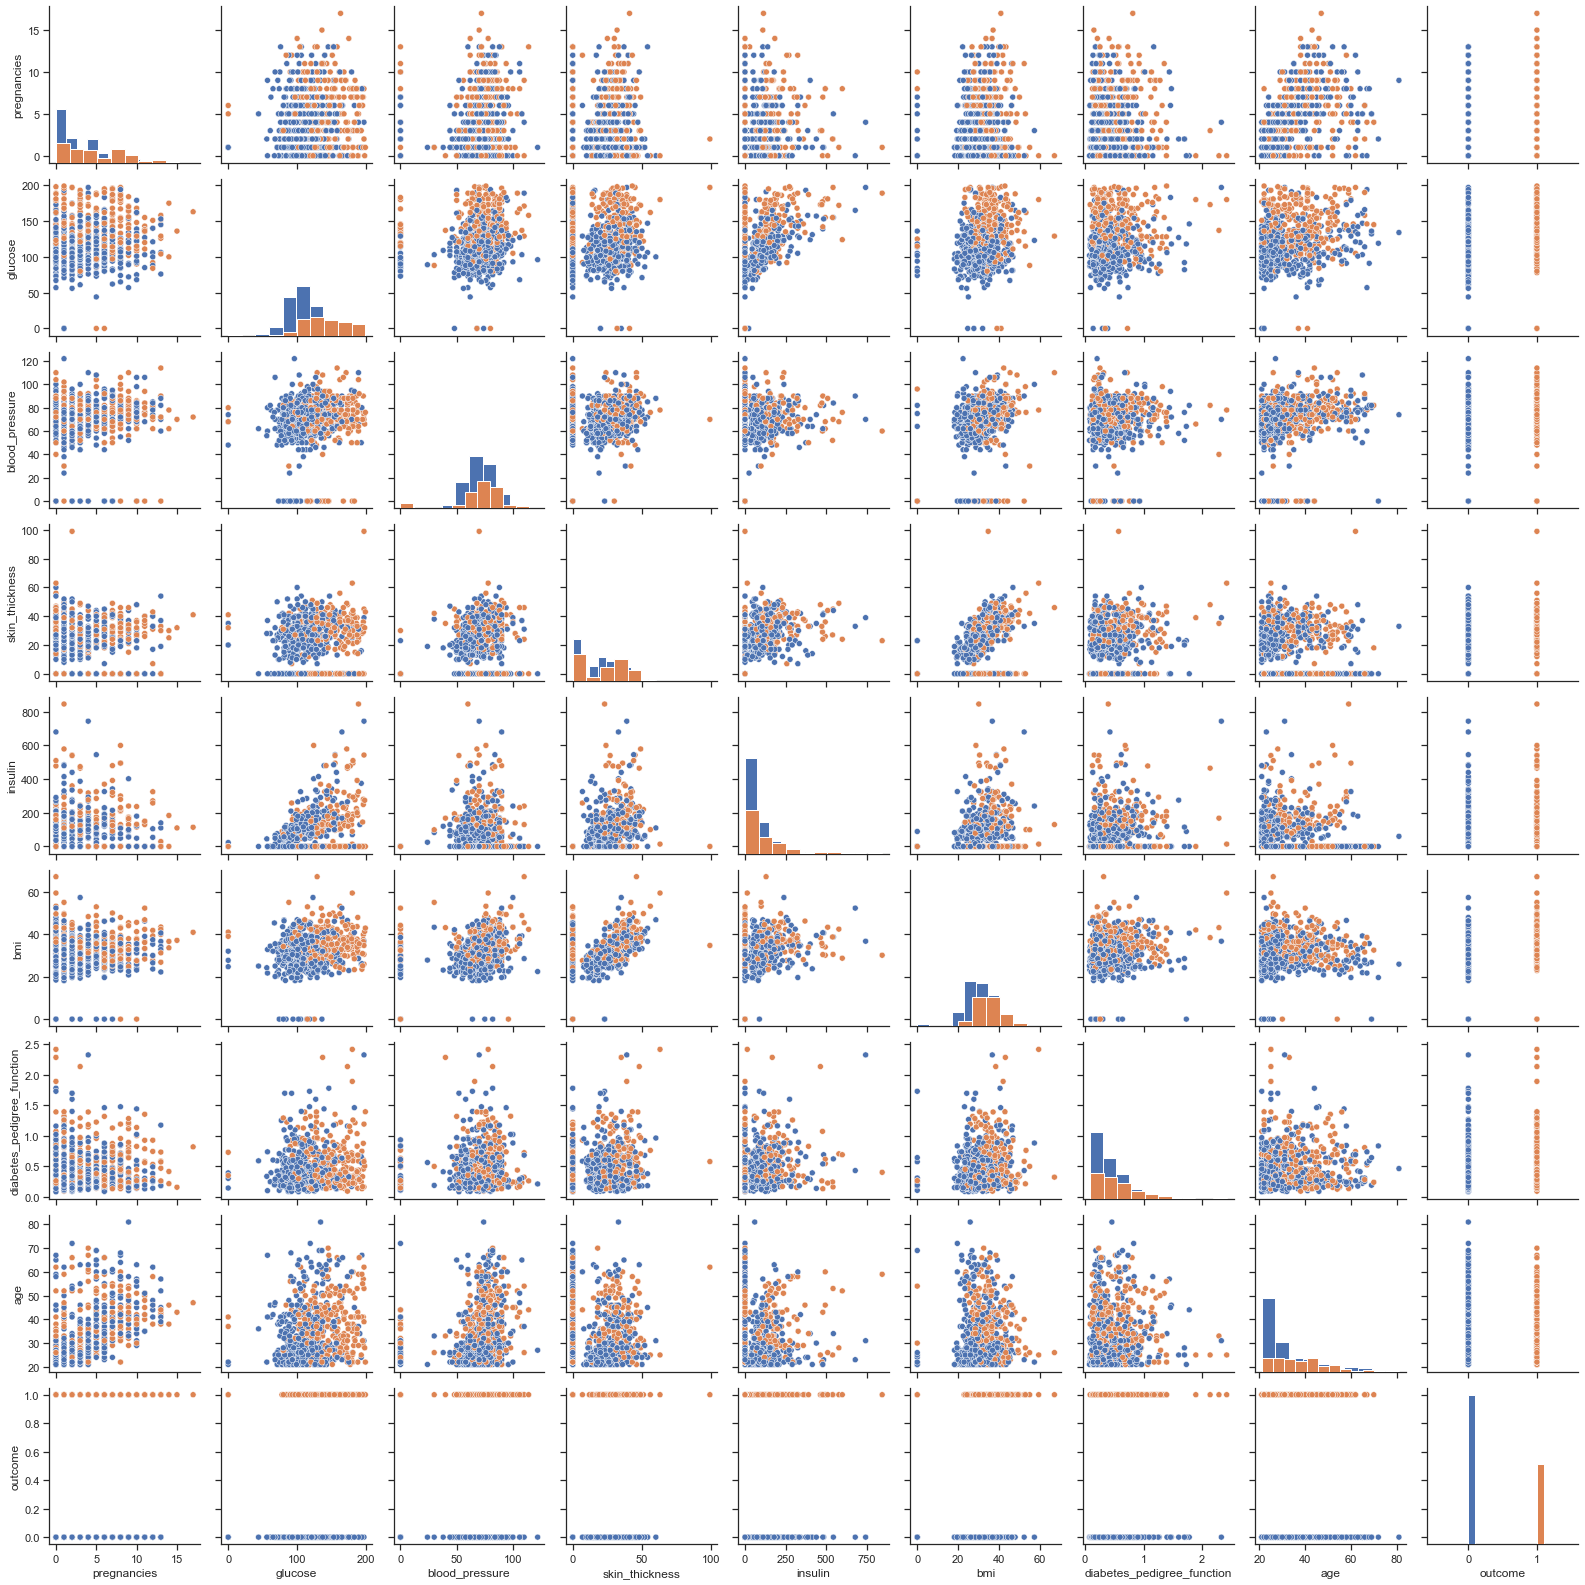

In [44]:
plot_diabetes(diabetes_input, diabetes_labels)

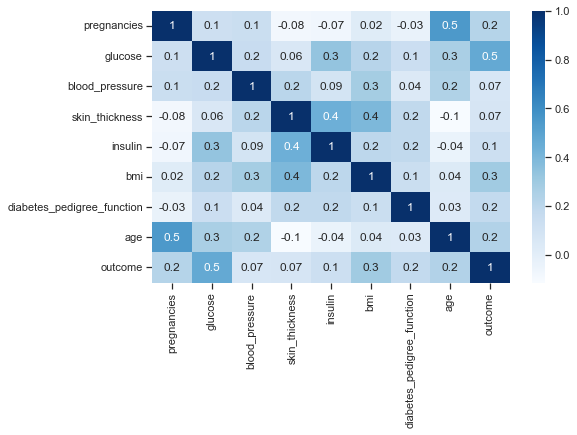

In [49]:
corre_plot_diabetes(diabetes_input, diabetes_labels)

### Checking model for overall features by splitting it 80-20 perecentage

In [10]:
data_inputs = diabetes_input
data_outputs = outcome

# Concatenate data_inputs and data_outputs into a single matrix
data_matrix = np.c_[data_inputs, data_outputs]

# split in the class 80-20
training_data, validation_data = data_split(data_matrix, 0.2)

# Separate the inputs and outputs of the training set
training_data_inputs=training_data[:,:-1]
training_data_outputs=training_data[:,-1].reshape(-1, 1)

# Separate the inputs and outputs of the validation set
validation_data_inputs=validation_data[:,:-1]
validation_data_outputs=validation_data[:,-1].reshape(-1, 1)

<b> Explanation: </b>
    
This code performs the following steps:

Assigns the variables data_inputs and data_outputs to the diabetes_input and outcome variables, respectively.
Concatenates the data_inputs and data_outputs matrices into a single matrix using np.c_[data_inputs, data_outputs].
Splits the data matrix into a training set and a validation set using the data_split() function with a validation ratio of 0.2.
Separates the inputs and outputs of the training set into separate variables training_data_inputs and `

In [11]:
def linear_regression_data(data_inputs):
    # Create a column of ones with the same number of rows as data_inputs
    first_column = np.ones((len(data_inputs), 1))
    # Concatenate the column of ones and data_inputs into a single matrix
    X_matrix = np.c_[first_column, data_inputs]
    # Return the resulting matrix
    return X_matrix

<b> Explanation: </b>
    
This code performs the following steps:

Defines a function linear_regression_data() that takes in a single argument data_inputs.
It creates a column of ones with the same number of rows as data_inputs using np.ones((len(data_inputs), 1))
Concatenates the column of ones and data_inputs into a single matrix using np.c_[first_column, data_inputs].
Returns the resulting matrix.
This function is used to prepare the data inputs for linear regression by adding a column of ones to the inputs matrix in order to include the bias term in the linear regression model.

In [12]:
def model_function(data_matrix, weights):
    # Perform matrix multiplication between data_matrix and weights
    return data_matrix @ weights

<b> Explaination: </b>

This function is used to calculate the output of a model given the input data and a set of weights. It takes in two arguments:
    
data_matrix: A matrix of input data, where each row represents an instance and each column represents a feature.
    
weights: A vector of parameters learned by the model.
The function performs matrix multiplication between data_matrix and weights, this is commonly represented as data_matrix @ weights. This operation calculates the dot product of the data_matrix and the weights, this is the output of the model. This output is then used for further computation like prediction, classification, or regression.

In [13]:
def logistic_function(inputs):
    # Apply the logistic function (also known as sigmoid function) element-wise on inputs
    return 1 / (1 + np.exp(-inputs))

<b> Explanation: </b>

This function is used to calculate the output of the logistic function, also known as the sigmoid function, on a given input. It takes in a single argument, inputs, which can be a scalar, a vector, or a matrix of values.
The function applies the logistic function element-wise on the inputs, which is defined as 1/(1+e^(-inputs)).
This function maps the input values to a probability range of [0,1]. It is commonly used in logistic regression and neural networks to model the probability of a certain outcome.

In [14]:
def binary_prediction_function(data_matrix, weights):
    # the binary classification can be obtained by applying the logistic function to the predicted ys i.e., Xw
    # in this first implementation we use classic regression first then use the logistic function later
    probability = logistic_function(model_function(data_matrix, weights))
    return probability > 0.5

<b> Explanation: </b>

This code performs the following steps:

Defines a function binary_prediction_function() that takes in two arguments data_matrix and weights.
Applies the logistic function to the predicted ys, which is obtained by applying the model function to the data_matrix and the weights probability = logistic_function(model_function(data_matrix, weights))
Return true if the probability is greater than 0.5, false otherwise return probability > 0.5
This function is used to predict a binary outcome from the model, by applying the logistic function to the predicted ys, and returning true if the probability is greater than 0.5, false otherwise.

In [15]:
def gradient_descent(objective,gradient,initial_weights,step_size=1,no_of_iterations=100,print_output=10):
    # Initialize list to store objective values
    objective_values = []
    # Make a copy of the initial weights
    weights = np.copy(initial_weights)
    # Append the initial objective value
    objective_values.append(objective(weights))
    # Perform the gradient descent algorithm for a specified number of iterations
    for counter in range(no_of_iterations):
        # Update the weights by subtracting the gradient of the objective function 
        # multiplied by the step size from the current weights
        weights -= step_size * gradient(weights)
        # Append the updated objective value
        objective_values.append(objective(weights))
        # Print the objective value every "print_output" iterations
#         if (counter + 1) % print_output == 0:
#             print("Iteration {k}/{m}, objective = {o}.".format(k=counter+1,m=no_of_iterations, 
#                                                                o=objective_values[counter]))
#     # Print the final iteration and objective value
#     print("Iteration completed after {k}/{m}, objective = {o}.".format(k=counter+ 1,
#                                                                        m=no_of_iterations, 
#                                                                        o=objective_values[counter]))
    return weights, objective_values

<b> Explanation: </b>

The code defines a function called "gradient_descent" which performs the gradient descent algorithm. The function takes several inputs, including:

objective: a function that takes in a weight vector and returns a scalar value representing the objective function to be minimized

gradient: a function that takes in a weight vector and returns a vector representing the gradient of the objective function at that point

initial_weights: a starting weight vector

step_size: a scalar value that controls the step size at each iteration of the gradient descent algorithm

no_of_iterations: the number of iterations for which the algorithm should run

print_output: an optional parameter that controls how often the current objective value is printed to the console during the iterations

The function starts by initializing a list to store objective values and making a copy of the initial weights. It then runs a loop for the specified number of iterations, updating the weights at each iteration by subtracting the gradient of the objective function multiplied by the step size from the current weights. It stores the updated objective value and prints it to the console if the current iteration is a multiple of the print_output parameter. Finally, the function returns the final weight vector and the list of objective values.

In [16]:
def binary_logistic_regression_cost_function(data_matrix, data_labels,weights):
    # Calculate the output of the model using the input data and weights
    regression_outputs = model_function(data_matrix, weights)
    # Compute the binary logistic regression cost function
    return np.mean(np.log(1 + np.exp(regression_outputs)) -data_labels * regression_outputs)

<b> Explanation: </b>

This function is used to calculate the cost of a binary logistic regression model given the input data, labels, and weights.
It takes in three arguments:

data_matrix: A matrix of input data, where each row represents an instance and each column represents a feature.
    
data_labels: A vector of binary labels where each label is either 0 or 1
    
weights: A vector of parameters learned by the model.
    
It first calculates the output of the model using the input data and weights using the model_function, then it computes the cost function of binary logistic regression. The cost function is defined as the mean of log(1+e^(regression_outputs))- data_labels * regression_outputs. This cost function is commonly used in logistic regression to measure the difference between the predicted labels and the true labels.

In [17]:
def binary_logistic_regression_gradient(data_matrix, data_labels, weights):
    return data_matrix.T @ (logistic_function(model_function(data_matrix, weights)) - data_labels) / len(data_matrix)

<b> Explanation: </b>
This function is used to calculate the gradient of the binary logistic regression cost function given the input data, labels, and weights. It takes in three arguments:

data_matrix: A matrix of input data, where each row represents an instance and each column represents a feature.

data_labels: A vector of binary labels where each label is either 0 or 1

weights: A vector of parameters learned by the model.
It first calculates the output of the logistic function on the model's output using the logistic_function, then it computes the gradient of the binary logistic regression cost function. The gradient is defined as the dot product of the transpose of data_matrix and the difference between the logistic_outputs and data_labels, divided by the number of instances in data_matrix. This gradient is used to update the weights of the model during training using a gradient descent algorithm.

In [18]:
# first let's get the data matrix from the inputs
diabetes_data_matrix = linear_regression_data(training_data_inputs)

# we then define the cost function
diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                 training_data_outputs, weights)
# then we get the gradient
diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                training_data_outputs, weights)

# start with w^0
diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

# set the step size
diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

# apply gradient descent
diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                     diabetes_gradient_function,
                                                                     diabetes_initial_weights,
                                                                     diabetes_step_size,2000, 200)

# get the predicte labels
predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

# measure the accuracy comparing predicted VS real labels
diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)

print("\n")
print("The optimal weights are w = {w}".format(w=diabetes_optimal_weights.T))
print("\n")
print("The classification accuracy for the 'Training Set' is {p} %.".format(
    p=100 * diabetes_accuracy_rate))



The optimal weights are w = [[-0.88505587  0.29599118  1.06483335 -0.19967432  0.08898662 -0.14906566
   0.71191178  0.25797445  0.29671701]]


The classification accuracy for the 'Training Set' is 76.2214983713355 %.


<b> Explanation : </b>

This code is implementing logistic regression to predict diabetes outcomes using the training data. It first prepares the data by concatenating the inputs and outputs into a single matrix, and then splitting it into training and validation sets.

It defines a linear regression data function to add a column of ones to the data matrix, which is used for the bias term in the model.

It then defines the cost function, the gradient function and the prediction function for binary logistic regression.

It then applies gradient descent algorithm to the training data to obtain the optimal weights. The step size is calculated based on the norm of the diabetes data matrix.

It uses these optimal weights to obtain the predicted labels on the training data and then compares it with the true labels to get the accuracy of the model.

In [19]:
# first let's get the data matrix from the inputs
diabetes_data_matrix = linear_regression_data(validation_data_inputs)

# get the predicte labels
predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

# measure the accuracy comparing predicted VS real labels
diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)

print("\n")
print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
print("\n")
print("The classification accuracy for the 'Validation Set is {p} %.".format(
    p=100 * diabetes_accuracy_rate))



The optimal weights are w = [[-0.88505587  0.29599118  1.06483335 -0.19967432  0.08898662 -0.14906566
   0.71191178  0.25797445  0.29671701]].T.


The classification accuracy for the 'Validation Set is 79.22077922077922 %.


In [20]:
a=open(diabetes_dataset_path,'r')
for i in a:
    features=i.strip().split(',')
    break
a.close()
# we need to delete the last since that is the target!
features.pop()

# now we can get the order of the weights in terms of their values
c=0
list_features=[]
for i in diabetes_optimal_weights[1:]:
    list_features.append([i,features[c]])
    c+=1

list_features=sorted(list_features,reverse=True)
for i in list_features:
    print (i)


[array([1.06483335]), 'Glucose']
[array([0.71191178]), 'BMI']
[array([0.29671701]), 'Age']
[array([0.29599118]), 'Pregnancies']
[array([0.25797445]), 'DiabetesPedigreeFunction']
[array([0.08898662]), 'SkinThickness']
[array([-0.14906566]), 'Insulin']
[array([-0.19967432]), 'BloodPressure']


In [21]:
features=[]
for i in list_features:
    features.append(i[1])
for i in range(len(features)):
    diabetes_input=diabetes_dataframe[features[:i+1]]
    diabetes_labels = outcome.reshape(-1, 1)
    diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(diabetes_input)
    
    ###########################
    data_inputs = diabetes_input
    data_outputs = outcome

    data_matrix = np.c_[data_inputs, data_outputs]

    # split in the class 80-20
    training_data, validation_data = data_split(data_matrix, 0.2)

    #########################
    training_data_inputs=training_data[:,:-1]
    training_data_outputs=training_data[:,-1].reshape(-1, 1)

    validation_data_inputs=validation_data[:,:-1]
    validation_data_outputs=validation_data[:,-1].reshape(-1, 1)
    
    # first let's get the data matrix from the inputs
    diabetes_data_matrix = linear_regression_data(training_data_inputs)

    # we then define the cost function
    diabetes_cost_function = lambda weights: binary_logistic_regression_cost_function(diabetes_data_matrix,
                                                                                     training_data_outputs, weights)
    # then we get the gradient
    diabetes_gradient_function = lambda weights: binary_logistic_regression_gradient(diabetes_data_matrix,
                                                                                    training_data_outputs, weights)

    # start with w^0
    diabetes_initial_weights = np.zeros((len(diabetes_data_matrix.T), 1))

    # set the step size
    diabetes_step_size = 3.9 * len(diabetes_data_matrix) / (np.linalg.norm(diabetes_data_matrix))**2

    # apply gradient descent
    diabetes_optimal_weights, diabetes_objective_values_ =gradient_descent(diabetes_cost_function,
                                                                         diabetes_gradient_function,
                                                                         diabetes_initial_weights,
                                                                         diabetes_step_size,2000, 200)

    # get the predicte labels
    predicted_labels= binary_prediction_function(diabetes_data_matrix,diabetes_optimal_weights)

    # measure the accuracy comparing predicted VS real labels
    diabetes_accuracy_rate = classification_accuracy(predicted_labels,training_data_outputs)

    print(features[:i+1])
#     print("The optimal weights are w = {w}".format(w=diabetes_optimal_weights.T))
    print("The classification accuracy for the training set is {p} %.".format(
        p=100 * diabetes_accuracy_rate))
    
    
    # first let's get the data matrix from the inputs
    diabetes_data_matrix = linear_regression_data(validation_data_inputs)

    # get the predicte labels
    predicted_labels= binary_prediction_function(diabetes_data_matrix, diabetes_optimal_weights)

    # measure the accuracy comparing predicted VS real labels
    diabetes_accuracy_rate = classification_accuracy(predicted_labels,validation_data_outputs)
    
#     print("The optimal weights are w = {w}.T.".format(w=diabetes_optimal_weights.T))
    print("The classification accuracy for the validation set is {p} %.".format(
        p=100 * diabetes_accuracy_rate))
    print("\n")
    print("*****************************")

    

['Glucose']
The classification accuracy for the training set is 74.2671009771987 %.
The classification accuracy for the validation set is 75.32467532467533 %.


*****************************
['Glucose', 'BMI']
The classification accuracy for the training set is 76.0586319218241 %.
The classification accuracy for the validation set is 79.87012987012987 %.


*****************************
['Glucose', 'BMI', 'Age']
The classification accuracy for the training set is 77.36156351791531 %.
The classification accuracy for the validation set is 74.67532467532467 %.


*****************************
['Glucose', 'BMI', 'Age', 'Pregnancies']
The classification accuracy for the training set is 76.54723127035831 %.
The classification accuracy for the validation set is 77.92207792207793 %.


*****************************
['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction']
The classification accuracy for the training set is 76.0586319218241 %.
The classification accuracy for the validat

# Nearest neighbour classification


In [74]:
diabetes_dataframe = pd.read_csv("diabetes.csv")
diabetes_dataset_path = "diabetes.csv"
pregnancies = np.genfromtxt(diabetes_dataset_path,
                    delimiter=",",
                    skip_header=1,
                    usecols=[0]).astype(int)

glucose = np.genfromtxt(diabetes_dataset_path, 
                        delimiter=",", 
                        skip_header=1, 
                        usecols=[1]).astype(int)

blood_pressure = np.genfromtxt(diabetes_dataset_path,
                     delimiter=",",
                     skip_header=1,
                     usecols=[2]).astype(int)

skin_thickness = np.genfromtxt(diabetes_dataset_path,
                                delimiter=",",
                                skip_header=1,
                                usecols=[3]).astype(int)

insulin = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[4]).astype(int)

bmi = np.genfromtxt(diabetes_dataset_path,
                             delimiter=",",
                             skip_header=1,
                             usecols=[5]).astype(float)

diabetes_pedigree_function = np.genfromtxt(diabetes_dataset_path,
                                 delimiter=",",
                                 skip_header=1,
                                 usecols=[6]).astype(float)

age = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[7]).astype(int)

outcome = np.genfromtxt(diabetes_dataset_path,
                         delimiter=",",
                         skip_header=1,
                         usecols=[8]).astype(int)

indexes = np.argsort(pregnancies)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],blood_pressure[indexes],skin_thickness[indexes],\
                      insulin[indexes],bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

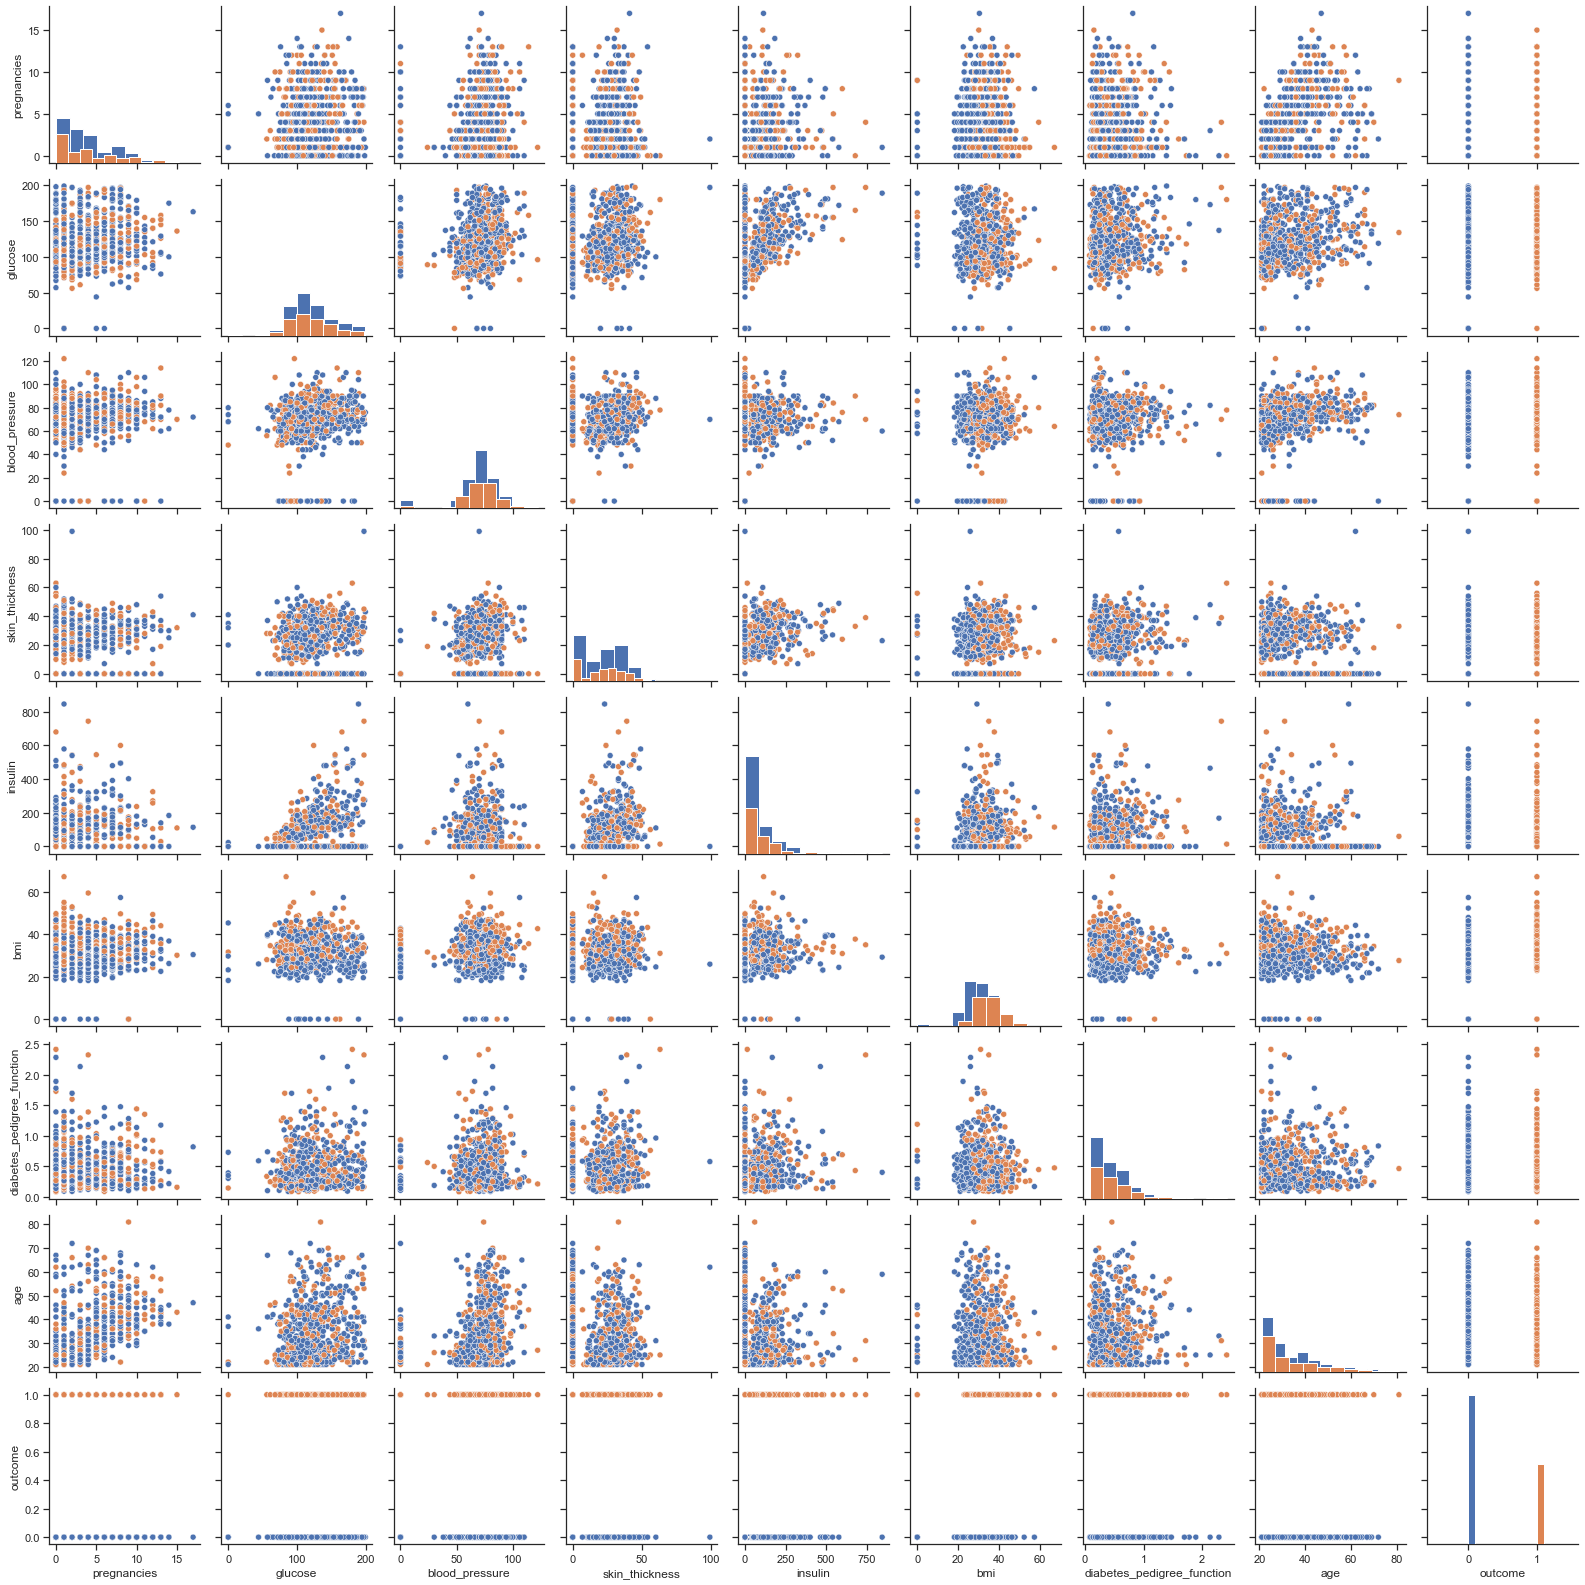

In [75]:
plot_diabetes(diabetes_input, diabetes_labels)

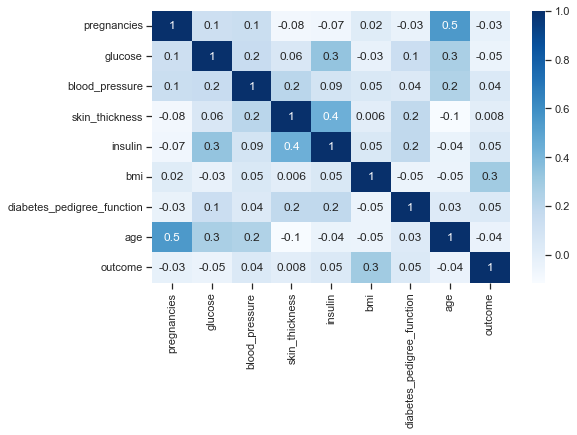

In [76]:
corre_plot_diabetes(diabetes_input, diabetes_labels)

In [77]:
# the pairwise distance is computed considering all the rows of from-data against all the rows of y
def pairwise_distances(from_data, to_data):
    return np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2))
# note how np.newaxis is used to extend the order of the array

<b> Explanation: </b>

This function takes in two arguments:

from_data: data from which pairwise distances will be computed

to_data: data to which pairwise distances will be computed

The function calculates the pairwise euclidean distance between all rows of from_data and all rows of to_data by using np.newaxis to extend the order of the array in order to calculate the distance using the np.sqrt(np.sum((from_data[:, np.newaxis, :] - to_data[np.newaxis, :, :])**2,axis=2)) formula. The returned value is the pairwise distances between the two data sets.

In [78]:
# we can put all together!
def nearest_neighbour_classification(testing_inputs, training_inputs,training_outputs, no_of_neighbours):
    
    # first thing is to compute pairwise distances
    distances = pairwise_distances(testing_inputs, training_inputs)
    # Get the number of classes in the training outputs
    no_of_classes = 1 + np.max(training_outputs)
    # Get the indices of the sorted distances
    sorted_indices = np.argsort(distances, axis=1)
    # Get the number of testing inputs
    no_of_inputs = len(testing_inputs) # these are the data that we are trying to classify
    # Get the number of training inputs
    no_of_points = len(training_inputs)
    # Create a new array with the same shape as the distances array, and fill it with the training outputs
    new_array_to_sort = np.broadcast_to(training_outputs,(no_of_inputs, no_of_points))
    # Take the labels of the nearest neighbours according to the sorted indices
    sorted_labels = np.take_along_axis(new_array_to_sort,sorted_indices, 1)
    # Initialize an array to store the predicted labels
    predicted_labels=np.zeros(no_of_inputs,int)
    # Iterate over the testing inputs
    for id_input in range(no_of_inputs):
        # Initialize an array to store the probability of each class
        probability_labels=np.zeros(no_of_classes,float)
        
        for id_neighbor in range(0,no_of_neighbours):
            probability_labels[sorted_labels[id_input][id_neighbor]]+=1./no_of_neighbours

        predicted_labels[id_input]=np.argmax(probability_labels)
    
    
    return predicted_labels

In [79]:
def KFold_split(data_size, K):
    # set the seed for reproducibility
    np.random.seed(123456789)
    # permute the indexes of the data
    indexes = np.random.permutation(data_size)
    # calculate the number of data points in each fold and the number of extra data points
    m, r = divmod(data_size, K)
    # split the permuted indexes into K folds
    indexes_split = [
        indexes[i * m + min(i, r):(i + 1) * m + min(i + 1, r)]
        for i in range(K)
    ]
    # return the split indexes
    return indexes_split

<b> Explanation: </b>

This function accepts two arguments:

data_size: the number of data points in the dataset

K: the number of folds for the cross-validation
It first sets a seed for reproducibility of the random permutation, then it permutes the indexes of the data using the np.random.permutation function. It then uses the divmod function to calculate the number of data points in each fold and the number of extra data points. Next, it splits the permuted indexes into K folds, where each fold contains m data points and the first r folds contain one additional data point. Finally, it returns the split indexes.

In [80]:
def KFold_cross_validation_knn(data_inputs, data_outputs, K, labels_evaluation,
                           missclassification_evaluation,knn):
    # get the number of data points
    data_size = len(data_inputs)
    # split the data into K folds
    indexes_split = KFold_split(data_size, K)
    # initialize the average accuracy to 0
    average_accuracy = 0
    # for each fold
    for i in range(K):
        # join the indexes of the folds that will be used for training
        training_indexes = np.concatenate([indexes_split[j] for j in range(K) if (j != i)])
        # evaluate the labels using the inputs, outputs and knn from the training set
        predicted_labels = labels_evaluation(data_inputs[indexes_split[i]],
                                             data_inputs[training_indexes],
                                             data_outputs[training_indexes],knn)
        # evaluate the missclassification rate of the predicted labels
        accuracy = missclassification_evaluation(predicted_labels,
                                              data_outputs[indexes_split[i]])
        # update the average accuracy
        average_accuracy += accuracy / K
    # calculate the error rate
    error = 1.-average_accuracy
    # return the error rate
    return error

<b>Explanation: </b>

This function performs K-fold cross-validation for a k-nearest neighbors (knn) classifier. It takes in several arguments:

data_inputs: the input features of the dataset

data_outputs: the corresponding output labels of the dataset

K: the number of folds for the cross-validation

labels_evaluation: a function that takes in the test set, training set, training set labels, and knn and returns the predicted labels

missclassification_evaluation: a function that takes in the predicted labels and the true labels and returns the missclassification rate

knn : the number of nearest neighbor to consider

It first gets the number of data points, and then splits the data into K folds using the KFold_split function. It initializes the average accuracy to 0 and for each fold, it joins the indexes of the folds that will be used for training. It then evaluates the labels using the inputs, outputs and knn from the training set, and evaluates the missclassification rate of the predicted labels. It updates the average accuracy, and then calculates the error rate and returns the error rate.

In [81]:
def grid_search(objective, grid):
     # Initialize an empty array to store the values returned by the objective function
    values = np.array([])
    # Iterate over the points in the grid
    for point in grid:
        # Append the result of the objective function when called with the current point
        values = np.append(values, objective(point))
    # Return the point in the grid that gives the lowest value according to the objective function
    return grid[np.argmin(values)]

<b> Explanation: </b>
This function performs grid search. It takes in two arguments:

objective: a function that takes in a point in the grid and returns a value that will be used to evaluate the point

grid: a list of points that will be evaluated by the objective function.

It initializes an empty array to store the values returned by the objective function. It then iterates over the points in the grid, append the result of the objective function when called with the current point. The function then returns the point in the grid that gives the lowest value according to the objective function. This point is the point that minimizes the objective function.

In [82]:
# we can do the same thing more concisely using the KFold_cross_validation function defined above

# Set the number of folds for cross-validation
K=25

# Get the number of data points
data_size = len(diabetes_input)

# the range of number of nearest neighbours to test
Knn = list(range(1,28,1))

# the evaluation function which takes in testing data inputs,training data inputs, training data outputs and k and returns the predicted labels
evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

# Define the missclassification evaluation function which takes in predicted labels and true labels and returns the accuracy
missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)

# Define the K-fold cross-validation objective function which takes in k and returns the error rate
K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

# Find the optimal number of neighbours by minimizing the objective function
optimal_no_of_neighbours = grid_search(K_objective_function, Knn)

# Get the optimal classification error
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

<b> Explanation: </b>

This script performs K-fold cross-validation to find the optimal number of nearest neighbours (k) for a k-nearest neighbours classifier using the diabetes_input and diabetes_output data. First, it sets the number of folds for cross-validation to 25, and defines the range of number of nearest neighbours to test. It defines the evaluation function which takes in testing data inputs,training data inputs, training data outputs and k and returns the predicted labels. It defines the missclassification evaluation function which takes in predicted labels and true labels and returns the accuracy. It defines the K-fold cross-validation objective function which takes in k and returns the error rate. It then finds the optimal number of neighbours by minimizing the objective function and get the optimal classification error.

In [83]:
print("Optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

Optimal number of neighbours one needs to consider is equal to 13. 
In this case the prediction error would be as little as 26.56%.


## As per features importance, checking the accuracy by removing one after the other

### Removing insulin

In [84]:
indexes = np.argsort(pregnancies)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],blood_pressure[indexes],skin_thickness[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', optimal number of neighbours one needs to consider is equal to 21. 
In this case the prediction error would be as little as 26.17%.


### Removing insulin and skin thickness

In [85]:
indexes = np.argsort(pregnancies)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],blood_pressure[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin' & 'Skin Thickness', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin' & 'Skin Thickness', optimal number of neighbours one needs to consider is equal to 15. 
In this case the prediction error would be as little as 24.61%.


### Removing insulin, skin thickness and blood pressure

In [86]:
indexes = np.argsort(pregnancies)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', 'Skin Thickness' and 'Blood Pressure', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', 'Skin Thickness' and 'Blood Pressure', optimal number of neighbours one needs to consider is equal to 22. 
In this case the prediction error would be as little as 24.87%.


### Removing insulin, skin thickness, blood pressure and pregnancies

In [87]:
indexes = np.argsort(pregnancies)

diabetes_input = np.c_[glucose[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', 'Skin Thickness','Blood Pressure' and 'Pregnancies', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', 'Skin Thickness','Blood Pressure' and 'Pregnancies', optimal number of neighbours one needs to consider is equal to 22. 
In this case the prediction error would be as little as 25.65%.


## sorting indexes as per glucose

### Removing BloodPressure 

In [124]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],skin_thickness[indexes],\
                      insulin[indexes],bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure', optimal number of neighbours one needs to consider is equal to 15. 
In this case the prediction error would be as little as 25.52%.


### Removing Blood Pressure and Insulin

In [89]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],skin_thickness[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure' and 'Insulin', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure' and 'Insulin', optimal number of neighbours one needs to consider is equal to 15. 
In this case the prediction error would be as little as 24.74%.


### Removing Blood Pressure, Insulin and Skin thickness

In [103]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure','Insulin' and 'Skin thickness' optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure','Insulin' and 'Skin thickness' optimal number of neighbours one needs to consider is equal to 27. 
In this case the prediction error would be as little as 24.09%.


### Removing Blood Pressure, Insulin, Skin thickness and DiabetesPedigreeFunction

In [102]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],\
                      bmi,age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure' and 'Insulin','Skin thickness' and 'DiabetesPedigreeFunction' optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure' and 'Insulin','Skin thickness' and 'DiabetesPedigreeFunction' optimal number of neighbours one needs to consider is equal to 22. 
In this case the prediction error would be as little as 24.21%.


### Removing Blood Pressure, Insulin, Skin thickness, DiabetesPedigreeFunction and Pregnancies

In [101]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[glucose[indexes],\
                      bmi,age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure' and 'Insulin','Skin thickness','DiabetesPedigreeFunction' and 'Pregnancies' optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure' and 'Insulin','Skin thickness','DiabetesPedigreeFunction' and 'Pregnancies' optimal number of neighbours one needs to consider is equal to 14. 
In this case the prediction error would be as little as 24.86%.


### Removing Blood Pressure, Insulin, Skin thickness, DiabetesPedigreeFunction, Pregnancies and Age

In [100]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[glucose[indexes],\
                      bmi]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure','Insulin','Skin thickness','DiabetesPedigreeFunction','Pregnancies' and 'Age' optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure','Insulin','Skin thickness','DiabetesPedigreeFunction','Pregnancies' and 'Age' optimal number of neighbours one needs to consider is equal to 15. 
In this case the prediction error would be as little as 27.07%.


### Removing Blood Pressure, Insulin, Skin thickness, DiabetesPedigreeFunction, Pregnancies, Age and BMI

In [99]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[glucose[indexes],\
                      ]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Blood Pressure','Insulin','Skin thickness','DiabetesPedigreeFunction','Pregnancies','Age' and 'BMI', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Blood Pressure','Insulin','Skin thickness','DiabetesPedigreeFunction','Pregnancies','Age' and 'BMI', optimal number of neighbours one needs to consider is equal to 20. 
In this case the prediction error would be as little as 26.42%.


### Removing insulin

In [96]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],blood_pressure[indexes],skin_thickness[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', optimal number of neighbours one needs to consider is equal to 25. 
In this case the prediction error would be as little as 25.26%.


### Removing insulin and skin thickness

In [97]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],blood_pressure[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin' & 'Skin Thickness', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin' & 'Skin Thickness', optimal number of neighbours one needs to consider is equal to 12. 
In this case the prediction error would be as little as 24.34%.


### Removing insulin, skin thickness and blood pressure

In [39]:
indexes = np.argsort(glucose)

diabetes_input = np.c_[pregnancies[indexes],glucose[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,50,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', 'Skin Thickness' and 'Blood Pressure', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', 'Skin Thickness' and 'Blood Pressure', optimal number of neighbours one needs to consider is equal to 37. 
In this case the prediction error would be as little as 23.69%.


### Removing insulin, skin thickness, blood pressure and pregnancies

In [98]:
indexes = np.argsort(pregnancies)

diabetes_input = np.c_[glucose[indexes],\
                      bmi,diabetes_pedigree_function[indexes],age[indexes]]

diabetes_output = outcome[indexes]

diabetes_labels = outcome.reshape(-1, 1)
diabetes_input, diabetes_row_of_means, diabetes_row_of_stds = standardise(
    diabetes_input)

#######################

# we can do the same thing more concisely using the KFold_cross_validation function defined above

K=5
data_size = len(diabetes_input)
Knn = list(range(1,28,1))


evaluation = lambda testing_data_inputs,training_data_inputs, training_data_outputs, k: nearest_neighbour_classification(testing_data_inputs,training_data_inputs,training_data_outputs,no_of_neighbours=k)

missclassification_evaluation= lambda predicted_labels,true_labels: classification_accuracy(predicted_labels,true_labels)


K_objective_function = lambda k: KFold_cross_validation_knn(diabetes_input,diabetes_output, K,evaluation,missclassification_evaluation,k)

optimal_no_of_neighbours = grid_search(K_objective_function, Knn)
optimal_classification_error = K_objective_function(optimal_no_of_neighbours)

#########################
print("After removing 'Insulin', 'Skin Thickness','Blood Pressure' and 'Pregnancies', optimal number of neighbours one needs to consider is equal to {n}. \nIn this case the prediction error would be as little as {e:2.2f}%."\
      .format(n = optimal_no_of_neighbours, e = 100*optimal_classification_error))

After removing 'Insulin', 'Skin Thickness','Blood Pressure' and 'Pregnancies', optimal number of neighbours one needs to consider is equal to 22. 
In this case the prediction error would be as little as 25.65%.
